# **Surabhi** **S**

# **Task 1 - For Data science and Business Analytics Intern at <br>The Sparks** **Foundation** - **GRIP**

Data Source -https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view
<br>


## **Prediction using Decision Tree Algorithm**
## **Problem Statement**

Create the Decision Tree classifier and visualize it graphically.

The purpose is if we feed any new data to this classifier, it would be able to
predict the right class accordingly.

## **Data Preprocessing**

In [ ]:
# importing required python libraries
import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt

In [ ]:
# load the data 
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


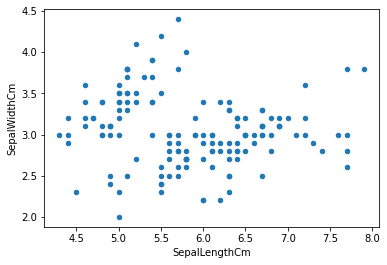

In [ ]:
data.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")

### **There seems to be a split between portions of the data (data points with large sepal width but lower sepal length seem to be clustered together**

In [ ]:
# separating features and labels
x = data.iloc[:,1:5]
y = data['Species']

In [ ]:
yd =pd.DataFrame(y)
yd['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

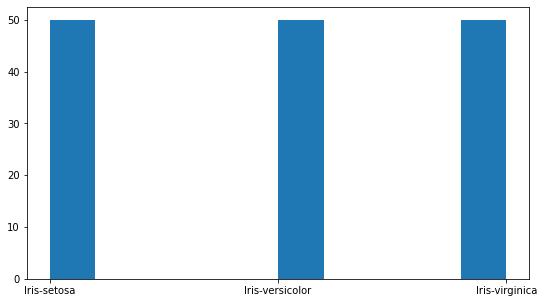

In [ ]:
# plot a histogram to visualise the classes
fig, ax = plt.subplots(figsize =(9, 5)) 
ax.hist(y) 
  
# Show plot 
plt.show()

In [ ]:
x.shape,y.shape  #  we have 150 rows

((150, 4), (150,))

In [ ]:
# splitting data to training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2 ,random_state=0)

## **Training model**

In [ ]:
# importing Decision Tree Classifier from sklearn library, training the model using training sets
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini',random_state=None)   # instantiating library
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## **Prediction**

In [ ]:
# predicting classes for test data
y_pred = model.predict(x_test)
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

## **Visualisation** **with graphviz**

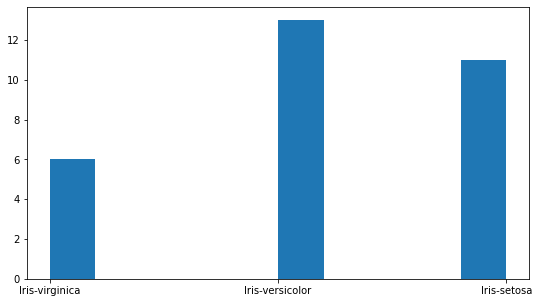

In [ ]:
figure, a = plt.subplots(figsize =(9, 5)) 
a.hist(y_pred) 
  
# Show plot 
plt.show()

In [ ]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(model, out_file=None, 
                                feature_names=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],  
                                class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
                                filled=True)

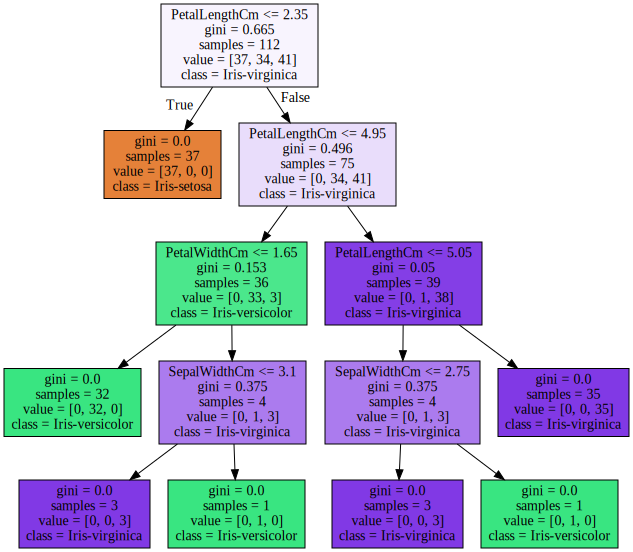

In [ ]:
# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

# **Summary**

Thus we were able to classify the model unknown test data(x_test). Let us look at the accuracy score to know how well our model was able to predict

In [ ]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred)
score

1.0

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])